<div style="text-align: center;">
    <img src="images/cat-face.jpg" style="width:650px;height:400px;">
</div>

# 1. Packages
This block includes steps to install and import necessary packages for the project. Packages such as NumPy, matplotlib, and h5py are crucial for numerical operations, data visualization, and handling HDF5 files, respectively.

### 1.1 Install Packages
This sub-block contains a command to install any missing packages using pip. It ensures all required libraries are available in the environment before proceeding.

In [75]:
# !pip install numpy matplotlib h5py

### 1.2 Import Packages
This sub-block imports essential Python libraries like NumPy, matplotlib, and h5py, which are required for data manipulation, visualization, and handling the dataset files.

In [76]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

<div style="text-align: center;">
    <img src="images/load-data.jpg" style="width:650px;height:400px;">
</div>


# 2. Load and Show Data 
This block is dedicated to loading and displaying the dataset. It includes functions to load the training and test data from HDF5 files,
which contain images labeled as cat (1) or non-cat (0).

### 2.1 Loading the Data (Cat/ Non-Cat)

This sub-block defines a function load_dataset to load the training and test datasets from HDF5 files. It extracts the features and labels from the dataset files, reshapes the labels, and returns them for further processing.

In [77]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [78]:
#Loading Data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### 2.2 Example of Traning Dataset

dataset ("data.h5") containing:
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1]


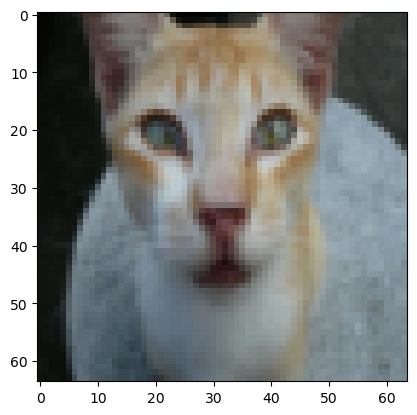

In [79]:
#Example of a picture
index = 11
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]))

In [80]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### 2.3 Flattened Image

For convenience, we should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a `flattened` image. There should be m_train (respectively m_test) columns.

In [81]:
# Reshape the training and test examples

# train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], (train_set_x_orig.shape[1] * train_set_x_orig.shape[1] * 3)).T
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

# test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], (test_set_x_orig.shape[1] * test_set_x_orig.shape[1] * 3)).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


### 2.4 Standardize our Dataset

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to `center and standardize` your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [82]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

print(f"Train_Set_X shape: {train_set_x.shape} , First 5 example of Train : \n\n{train_set_x[:, :5]}\n\n\n")
print(f"Test_Set_X shape: {test_set_x.shape} , First 5 example of Test : \n\n{test_set_x[:, :5]}")

Train_Set_X shape: (12288, 209) , First 5 example of Train : 

[[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412]
 [0.12156863 0.75294118 0.27843137 0.08627451 0.03529412]
 [0.21960784 0.74509804 0.26666667 0.00784314 0.01960784]
 ...
 [0.         0.32156863 0.54117647 0.00784314 0.06666667]
 [0.         0.31372549 0.55294118 0.23137255 0.12156863]
 [0.         0.31764706 0.55686275 0.00784314 0.08235294]]



Test_Set_X shape: (12288, 50) , First 5 example of Test : 

[[0.61960784 0.45098039 1.         0.99607843 0.37647059]
 [0.40784314 0.43137255 0.99215686 0.99607843 0.28235294]
 [0.3254902  0.43529412 0.99607843 0.95294118 0.24313725]
 ...
 [0.67843137 0.67058824 0.52156863 0.50588235 0.57254902]
 [0.50196078 0.69019608 0.39607843 0.32941176 0.51764706]
 [0.43137255 0.72941176 0.4745098  0.16862745 0.51764706]]


<div style="text-align: center;">
    <img src="images/main.jpg" style="width:650px;height:400px;">
</div>

# 3. Build the Neural Network
The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

### 3.1 Helper Functions

#### 3.1.1 Sigmoid Function
This block defines the sigmoid function, which is used to map predictions to probabilities in logistic regression.

In [83]:
def sigmoid(z):
    s = 1 / ( 1 + np.exp(-z))
    return s

#### 3.1.2 Initializign Parameters Function
This block contains a function to initialize parameters for the logistic regression model. It sets the weights and bias to zero or small random values.

In [84]:
def initialize(par):
    w = np.zeros((par, 1))
    b = 0.0

    return w, b

#### 3.1.3 Forward and Backward Propagation
This block implements functions for forward and backward propagation. Forward propagation calculates the cost and predictions, while backward propagation computes the gradients needed for updating the parameters.

In [85]:
def propagate(w, b, X, y):

    m = X.shape[1]
    
    #cost 
    A = sigmoid(np.dot(w.T , X) + b)
    cost = -1/m * np.sum(y * np.log(A) + ( 1 - y ) * np.log( 1 - A ))


    #grads
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)

    cost = np.squeeze(np.array(cost))
    grads = {"dw" : dw , "db" : db}

    return grads, cost

#### 3.1.4 Optimization Function
This block includes the optimization function that performs gradient descent. It updates the parameters iteratively to minimize the cost function.

In [86]:
def optimize(w, b, X, y, num_iterations = 100, learning_rate = 0.01, print_cost = False):

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

#### 3.1.5 Prediction Function
This block defines a function predict that uses the trained model parameters to make predictions on new data.

In [87]:
def predict(w, b, X):

    m = X.shape[1]
    yhat = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            yhat[0, i] = 1
        else:
            yhat[0, i] = 0
    return yhat 

### 3.2 Make the Model
This block integrates all the functions into a complete model function. It trains the logistic regression model using the training data, predicts outcomes for both training and test datasets, and returns the model parameters and performance metrics.

Implement the model function. Use the following notation:
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- parameters, grads, costs for the outputs of optimize()

In [88]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### 3.3 Train the Model
This block calls the model function to train the logistic regression model with specified hyperparameters like the number of iterations and learning rate.

In [89]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=10000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

<div style="text-align: center;">
    <img src="images/cost.jpg" style="width:650px;height:400px;">
</div>

# 4. Plot the Cost 
This block focuses on visualizing the cost function to monitor the learning process. It plots the cost against the number of iterations to show how the cost decreases as the model trains.

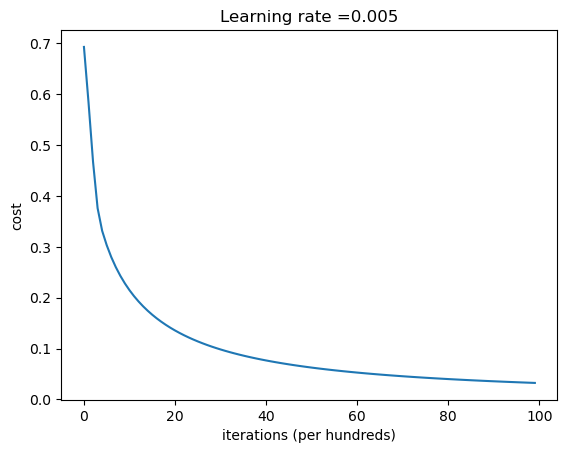

In [94]:
# Plot learning curve (with costs)
plt.plot(logistic_regression_model['costs'])
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()